In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ls ../results/muestras

gaussian_1_1e6/  kraskov_1/  kraskov_2/


In [3]:
ls ../results/firing_rates_10

copulas_4Ldmn/        copulas_visual/       kraskov_random/
copulas_4Ldmn_drug/   copulas_visual_drug/  kraskov_random_drug/
copulas_dmn/          kraskov_4Ldmn/        kraskov_visual/
copulas_dmn_drug/     kraskov_4Ldmn_drug/   kraskov_visual_drug/
copulas_random/       kraskov_dmn/
copulas_random_drug/  kraskov_dmn_drug/


In [4]:
is_dmn = True

In [5]:
if is_dmn:
    #results_folder = "../results/firing_rates_10/"
    #results_folder = "../results/firing_rates_3/"
    results_folder = "../results/firing_rates_4/"
else:
    #results_folder = "../results/muestras/kraskov_1/"
    results_folder = "../results/muestras/kraskov_2/"

gaussian_results = {}
for gaussian_i in sorted(os.listdir(results_folder)):
    gaussian_i_folder = os.path.join(results_folder, gaussian_i)
    gaussian_results[gaussian_i] = {
        "mean": [],
        "std": []
    }
    for n_data in sorted(os.listdir(gaussian_i_folder)):
        try:
            data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.txt")
            data = np.loadtxt(data_filepath, delimiter=",")
        except:
            data_filepath = os.path.join(gaussian_i_folder, n_data, "results_samples.npy")
            data = np.load(data_filepath)
        print(gaussian_i, n_data, data.shape, data_filepath)
        data_mean, data_std = data.mean(axis=0), data.std(axis=0)
        gaussian_results[gaussian_i]["mean"].append(data_mean)
        gaussian_results[gaussian_i]["std"].append(data_std)

copulas_4L1 100 (100, 3) ../results/firing_rates_4/copulas_4L1/100/results_samples.npy
copulas_4L1 1000 (100, 3) ../results/firing_rates_4/copulas_4L1/1000/results_samples.npy
copulas_4L1 10000 (100, 3) ../results/firing_rates_4/copulas_4L1/10000/results_samples.npy
copulas_4L1 100000 (100, 3) ../results/firing_rates_4/copulas_4L1/100000/results_samples.npy
copulas_4L1_drug 100 (100, 3) ../results/firing_rates_4/copulas_4L1_drug/100/results_samples.npy
copulas_4L1_drug 1000 (100, 3) ../results/firing_rates_4/copulas_4L1_drug/1000/results_samples.npy
copulas_4L1_drug 10000 (100, 3) ../results/firing_rates_4/copulas_4L1_drug/10000/results_samples.npy
copulas_4L1_drug 100000 (100, 3) ../results/firing_rates_4/copulas_4L1_drug/100000/results_samples.npy
copulas_4dmn1 100 (100, 3) ../results/firing_rates_4/copulas_4dmn1/100/results_samples.npy
copulas_4dmn1 1000 (100, 3) ../results/firing_rates_4/copulas_4dmn1/1000/results_samples.npy
copulas_4dmn1 10000 (100, 3) ../results/firing_rates_4/c

In [6]:
gaussian_results

{'copulas_4L1': {'mean': [array([0.194265, 0.191267, 0.002996]),
   array([2.4693e-02, 2.4677e-02, 1.5000e-05]),
   array([5.930e-03, 5.888e-03, 4.900e-05]),
   array([3.797e-03, 3.786e-03, 6.000e-06])],
  'std': [array([0.1057922 , 0.10214463, 0.02436003]),
   array([0.01306037, 0.01297388, 0.00095125]),
   array([0.00313849, 0.00309019, 0.00010148]),
   array([9.70407646e-04, 9.64678185e-04, 2.37486842e-05])]},
 'copulas_4L1_drug': {'mean': [array([0.173064, 0.168574, 0.004485]),
   array([0.022338, 0.022076, 0.00026 ]),
   array([4.846e-03, 4.831e-03, 2.000e-05]),
   array([2.944e-03, 2.935e-03, 1.000e-06])],
  'std': [array([0.10978619, 0.0950187 , 0.03347858]),
   array([0.01169935, 0.0111855 , 0.00123499]),
   array([2.27782440e-03, 2.24613869e-03, 8.71779789e-05]),
   array([7.16843079e-04, 7.09559723e-04, 9.94987437e-06])]},
 'copulas_4dmn1': {'mean': [array([ 0.169458,  0.172731, -0.003273]),
   array([0.026525, 0.026245, 0.00028 ]),
   array([7.407e-03, 7.359e-03, 4.900e-05])

In [7]:
try:
    with open("../data/muestras_1e5/index.json", "r") as f:
        index = json.load(f)
except:
    pass

/home/camilojd/Environments/wholebrain/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/camilojd/Environments/wholebrain/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """
/home/camilojd/Environments/wholebrain/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may 

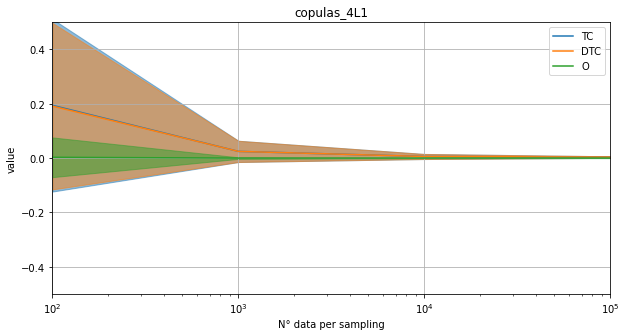

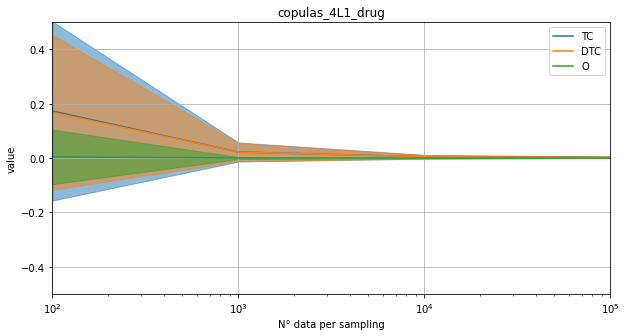

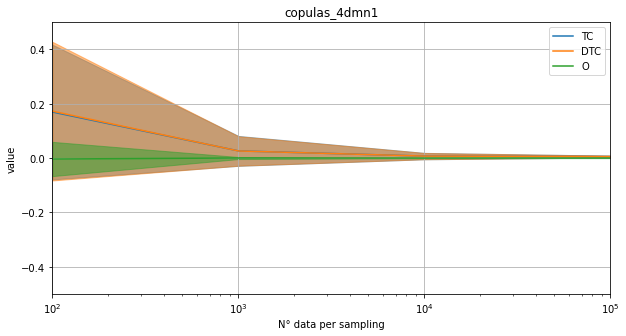

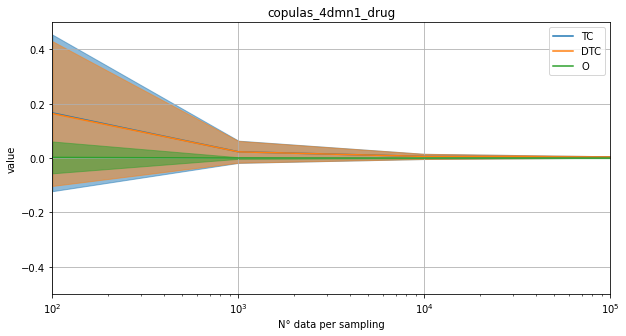

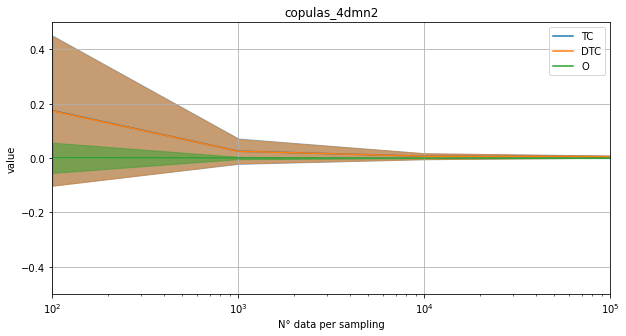

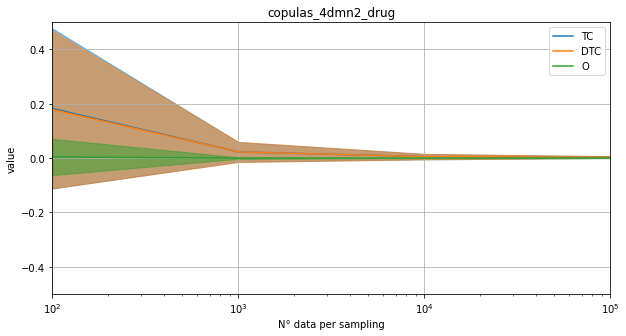

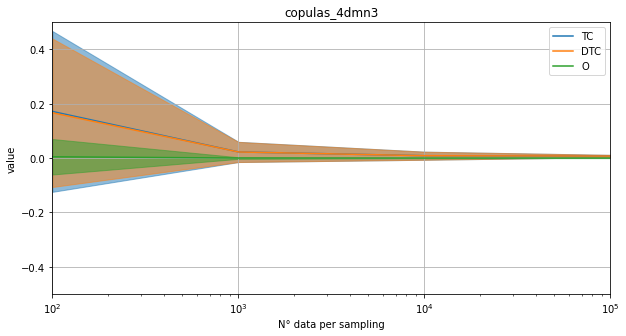

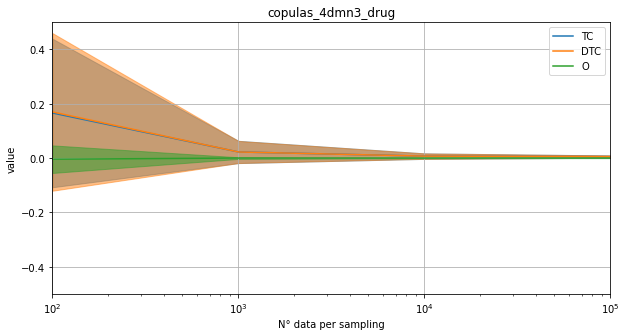

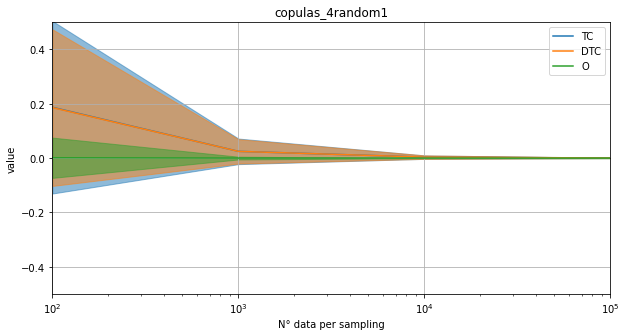

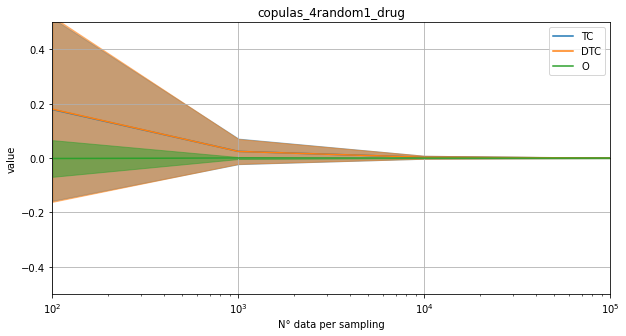

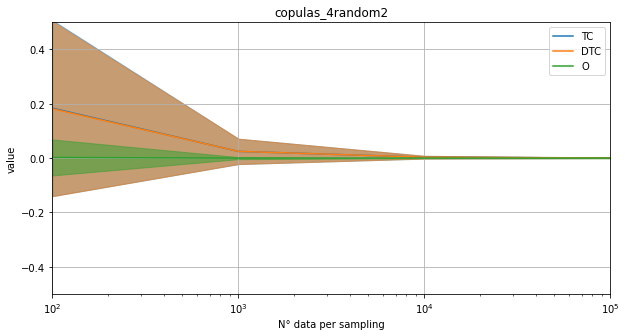

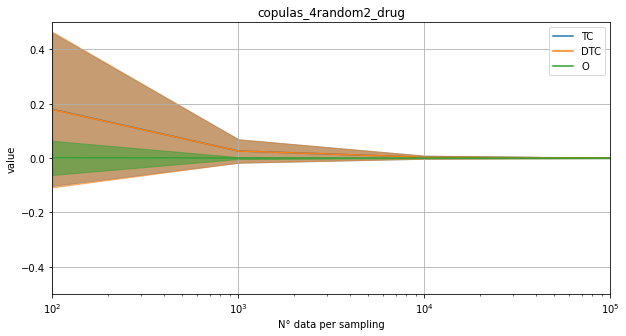

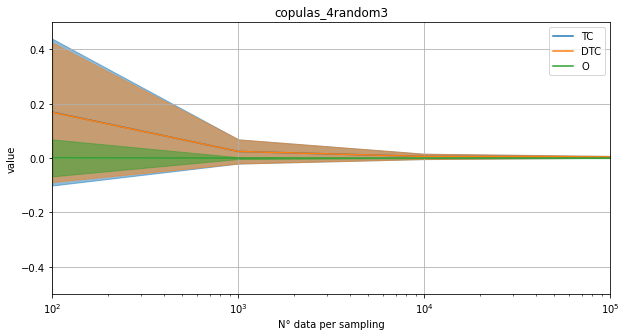

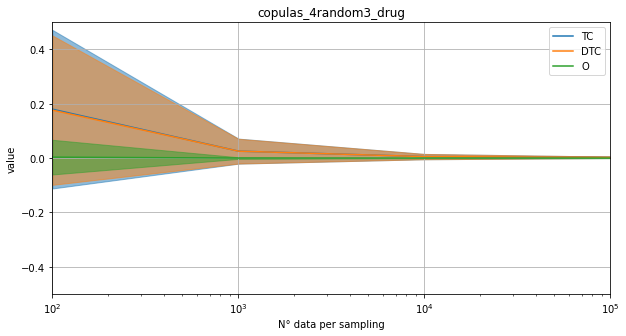

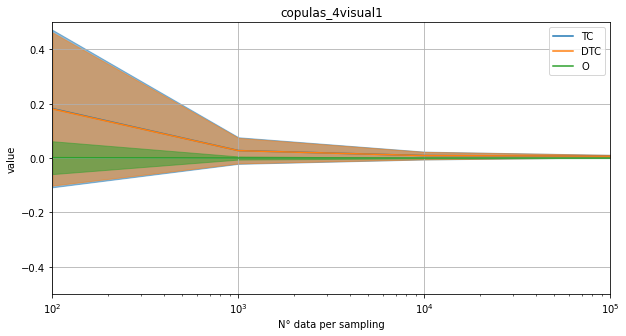

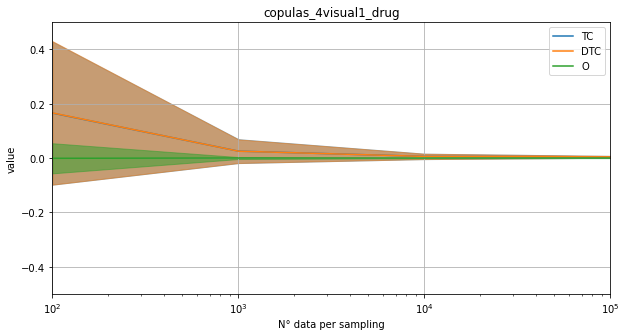

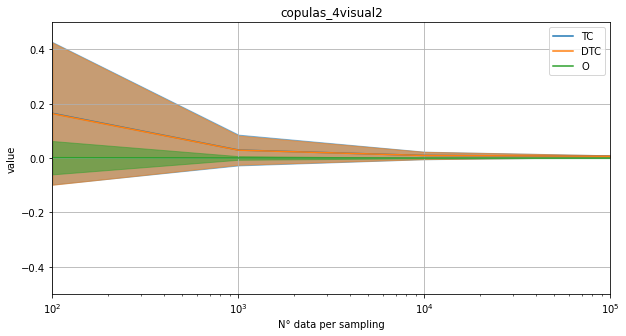

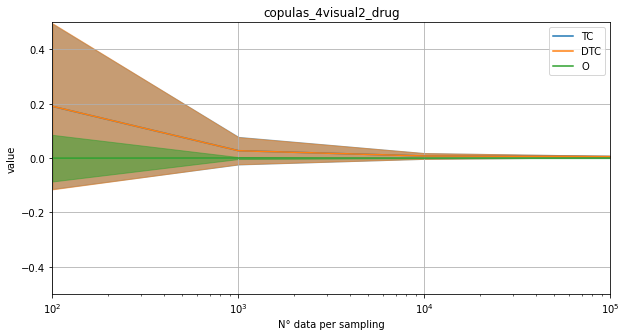

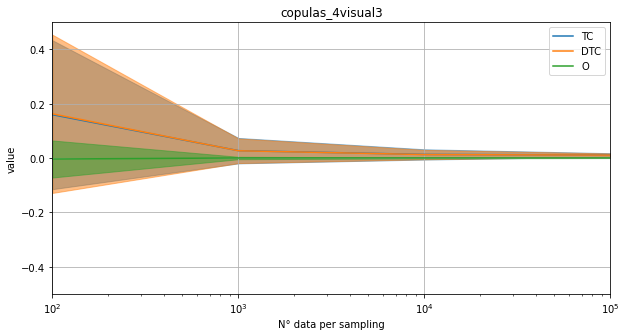

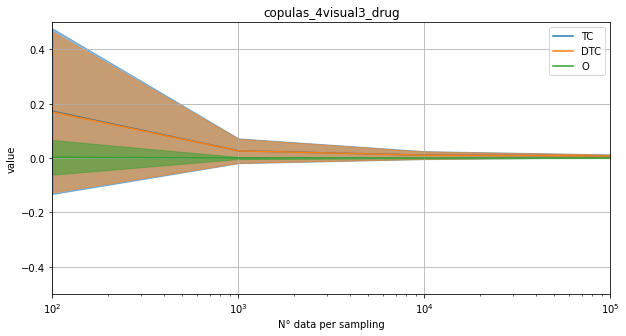

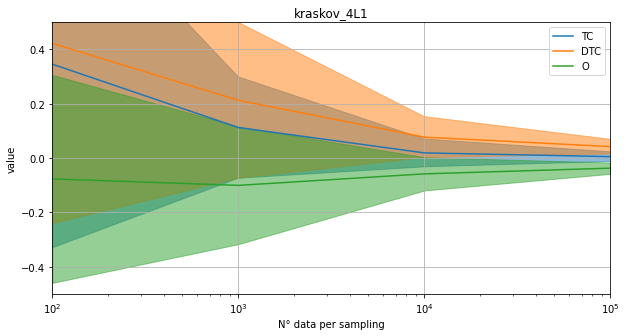

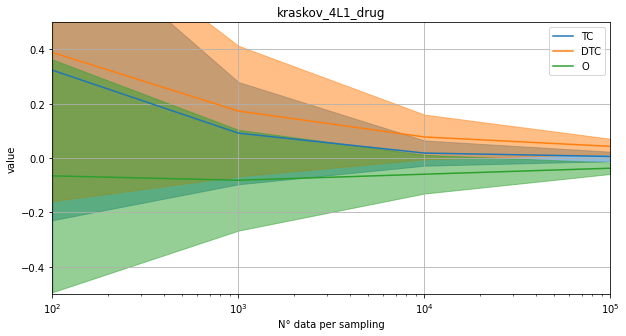

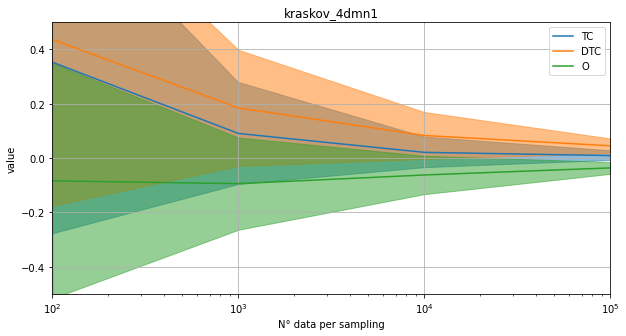

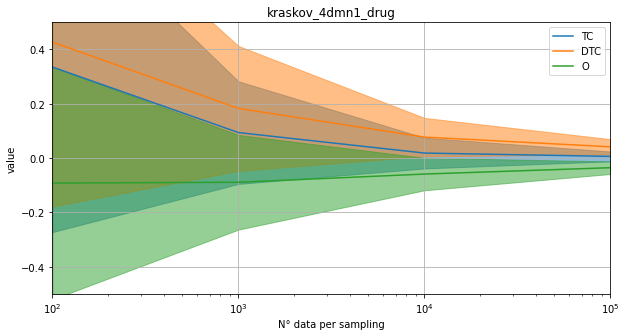

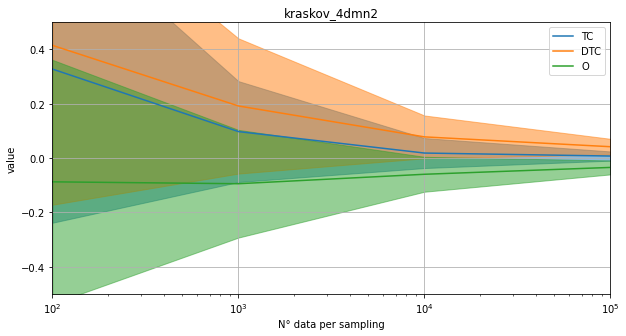

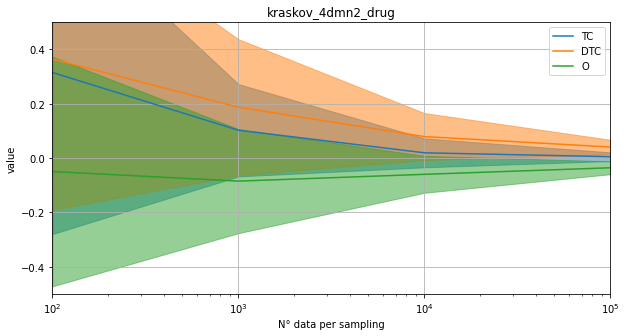

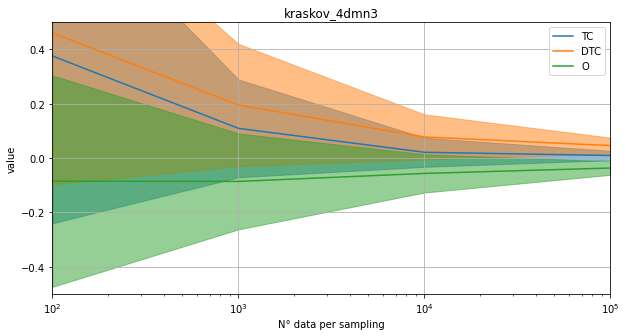

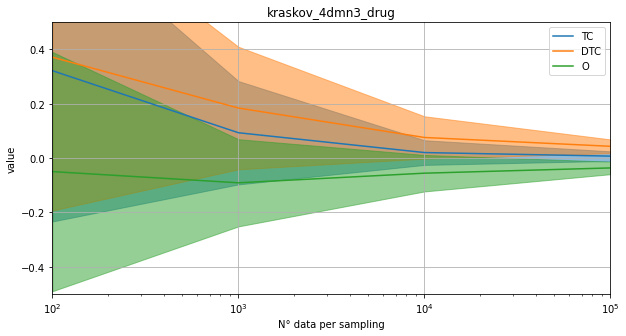

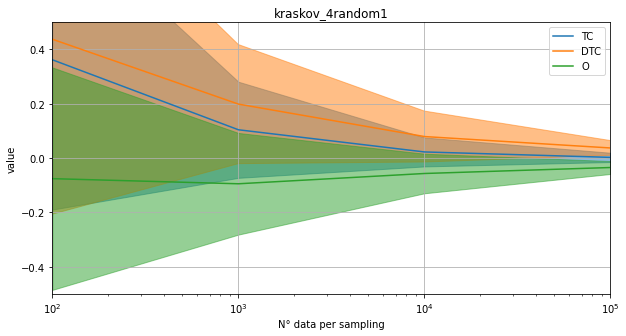

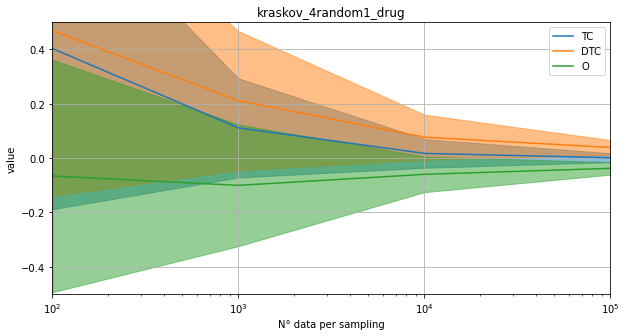

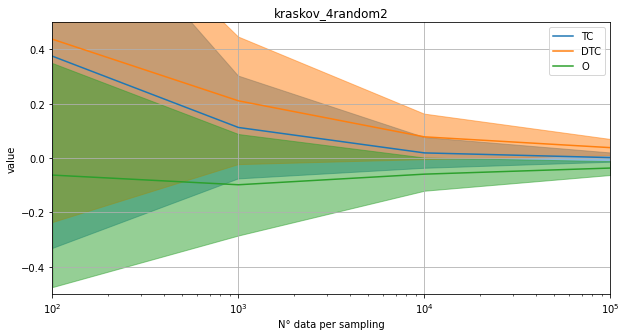

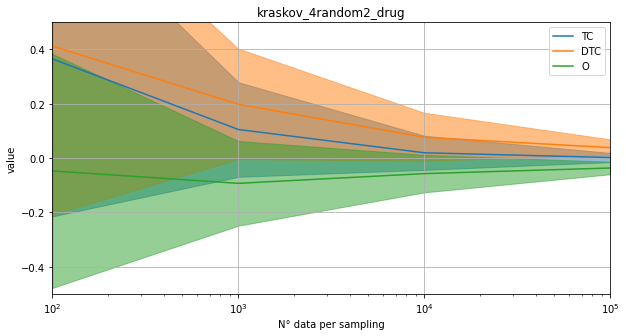

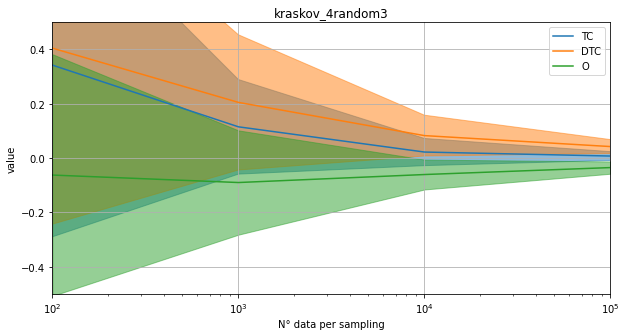

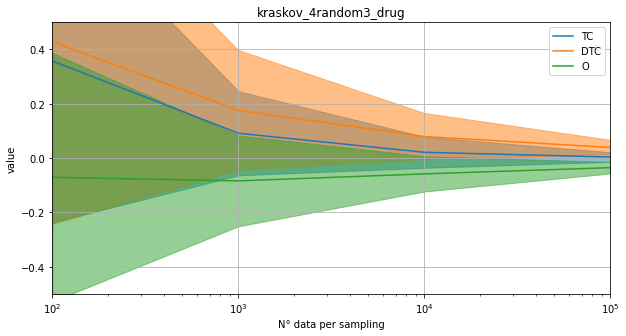

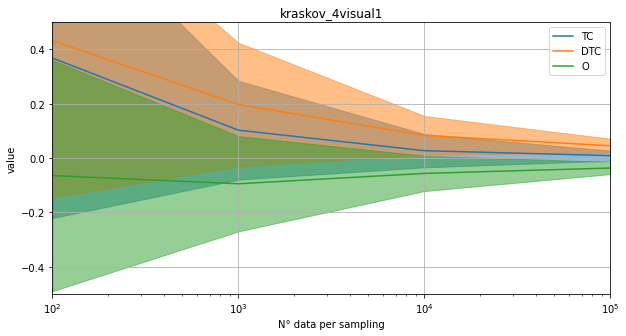

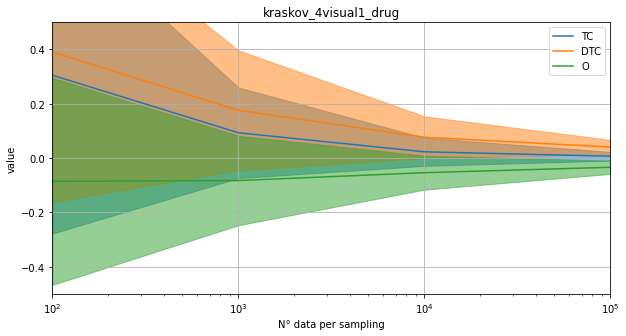

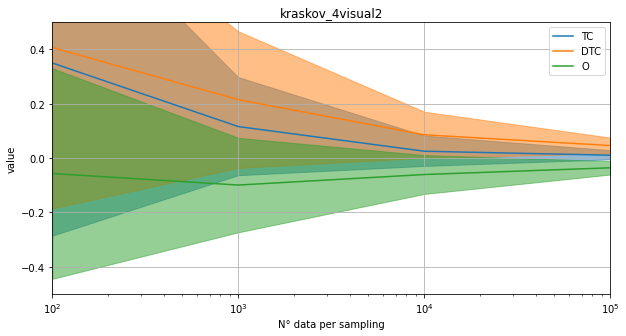

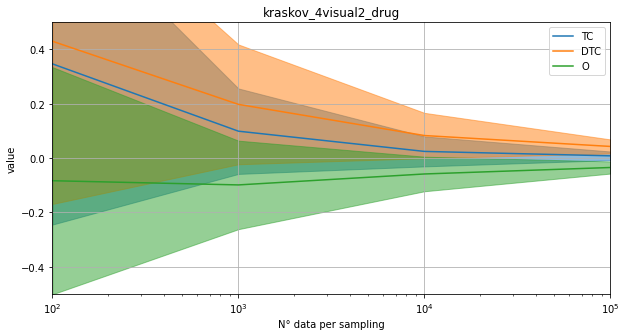

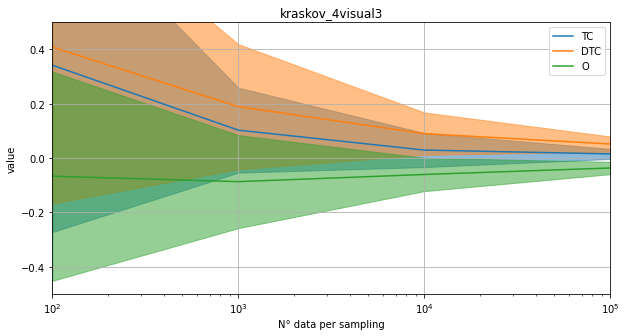

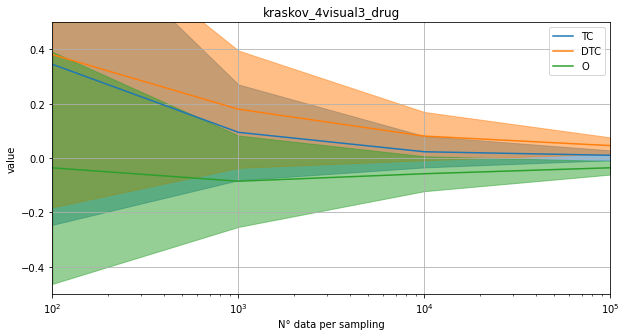

In [8]:
metrics_plot = ["TC", "DTC", "O"]
index_data = [100, 1000, 10000, 100000] #index_data = [100, 1000, 10000, 100000, 1000000]
for gaussian_i in sorted(os.listdir(results_folder)):
    try:
        fig, ax = plt.subplots(figsize=(10,5))
        mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
        std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
        mean[metrics_plot].plot(ax=ax)
        for i, metric_plot in enumerate(metrics_plot):
            ax.fill_between(mean.index, mean[metric_plot]-3*std[metric_plot], mean[metric_plot]+3*std[metric_plot], color=f"C{i}", alpha=0.5)
            if not is_dmn:
                ax.axhline(y=index[gaussian_i][metric_plot], color=f'C{i}', linestyle='--')
        ax.set_title(f"{gaussian_i}")
        ax.set_xscale('log')
        ax.set_xlim(index_data[0], index_data[-1])
        ax.grid()
        ax.set_xlabel("N° data per sampling")
        ax.set_ylabel("value")
        ax.set_ylim(-0.5, 0.5)
        #fig.savefig(f"../results/plots/{gaussian_i}.pdf")
    except:
        print("probably an error with index_data")
        pass

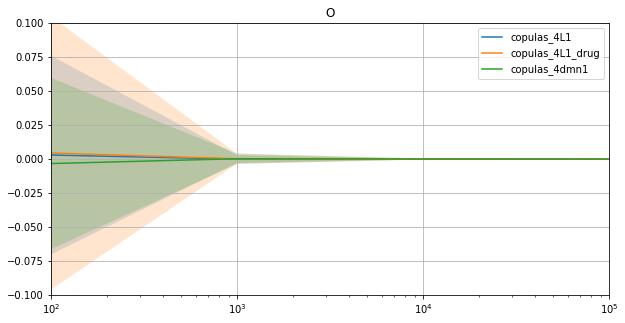

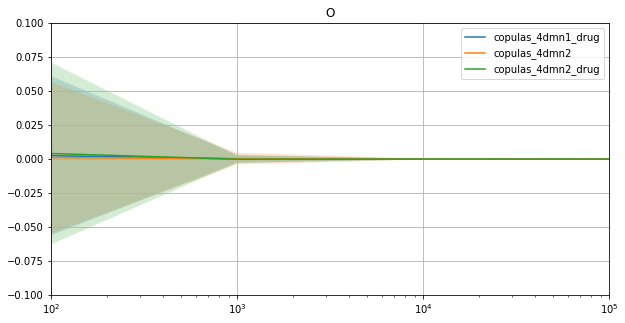

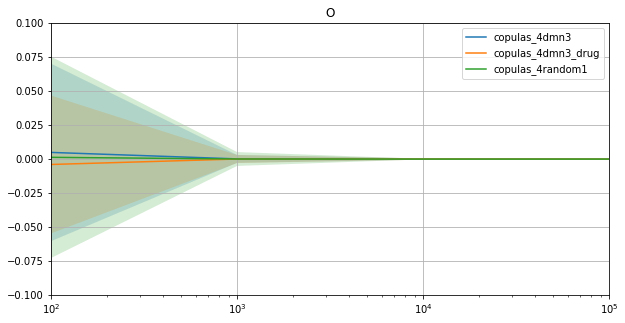

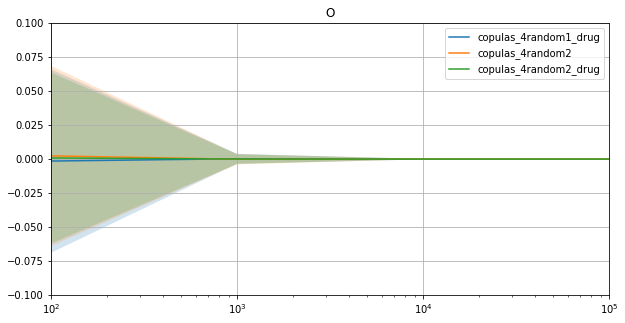

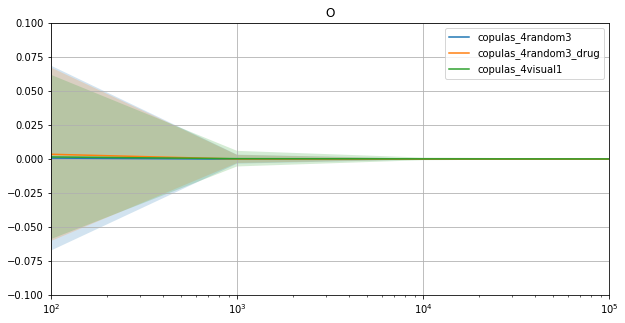

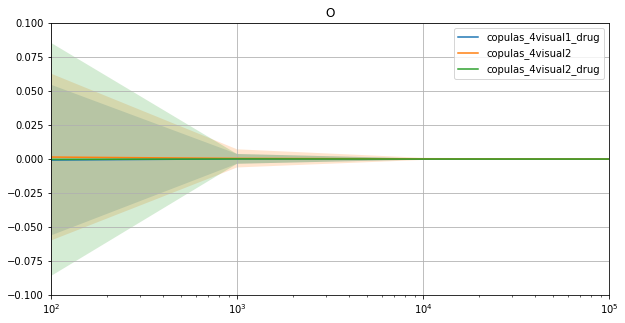

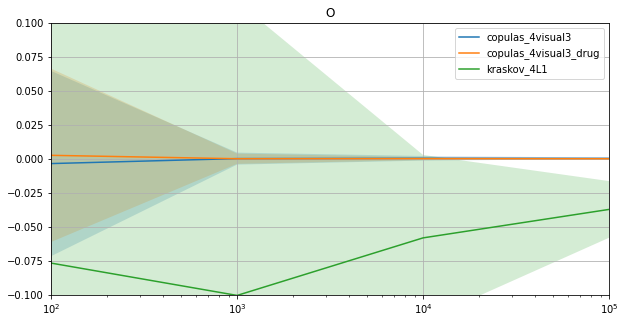

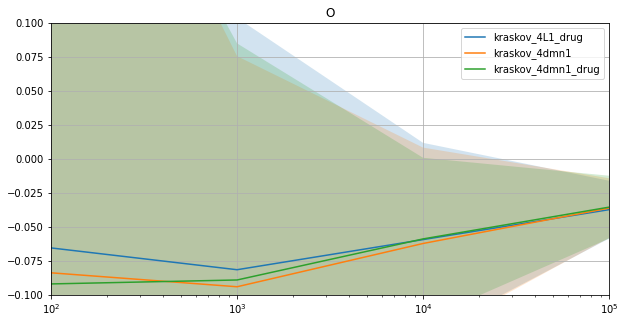

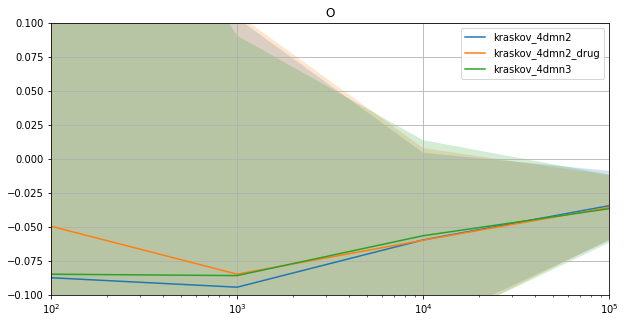

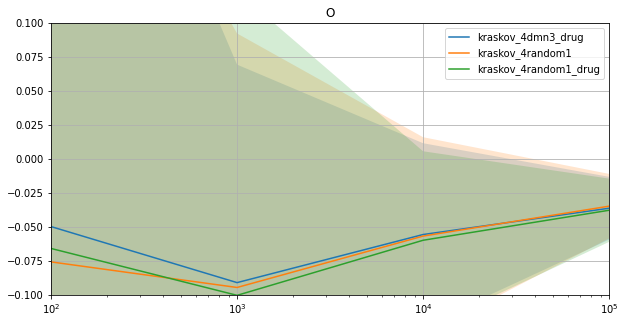

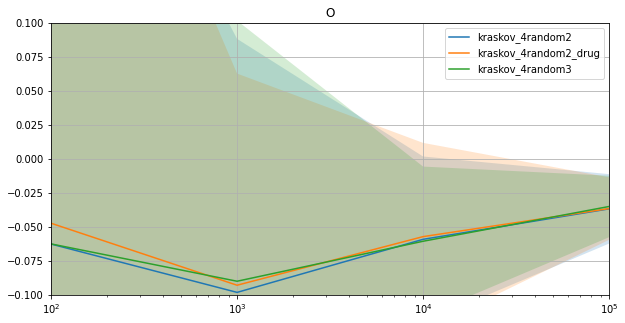

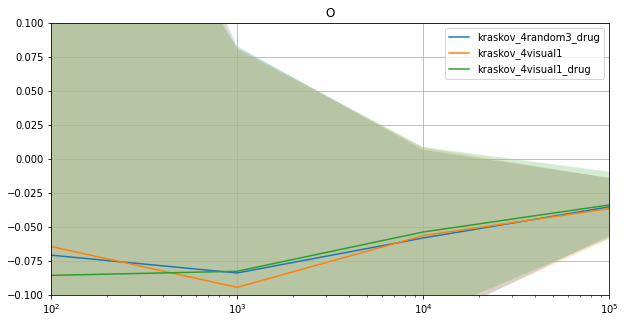

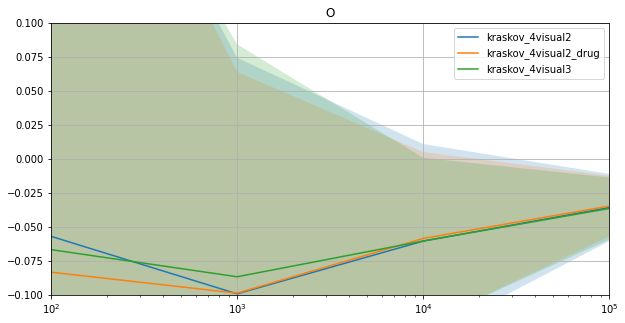

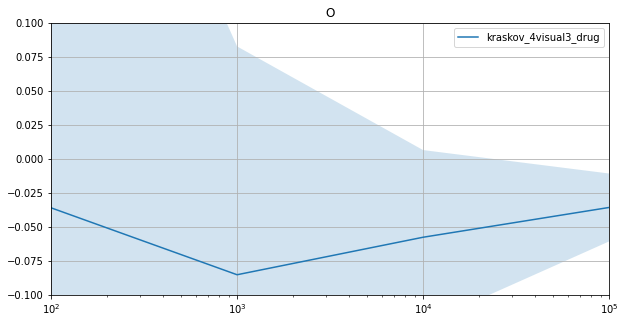

In [9]:
metric_plot = "O"
i = 0
for gaussian_i in sorted(os.listdir(results_folder)):
    if i % 3 == 0:
        i = 0
        fig, ax = plt.subplots(figsize=(10,5))
    mean = pd.DataFrame(gaussian_results[gaussian_i]["mean"], columns=["TC", "DTC", "O"], index=index_data)
    std = pd.DataFrame(gaussian_results[gaussian_i]["std"], columns=["TC", "DTC", "O"], index=index_data)
    mean = mean.rename(columns={metric_plot: gaussian_i})
    mean[[gaussian_i]].plot(ax=ax)
    ax.fill_between(mean.index, mean[gaussian_i]-3*std[metric_plot], mean[gaussian_i]+3*std[metric_plot], alpha=0.2)
    if not is_dmn:
        ax.axhline(y=index[gaussian_i][metric_plot], color=f"C{i}", linestyle='--')
    ax.set_xscale('log')
    ax.set_title(metric_plot)
    plt.xlim(10**2, 10**5)
    plt.ylim(-0.1, 0.1)
    plt.grid()
    #fig.savefig(f"../results/plots/groups/group_{metric_plot}_{gaussian_i}.png")
    i += 1